# USA Regional Sales Analysis
## Project Summary
This EDA notebook dives into XYZ's 2014–2018 USA sales dataset through:

Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

## Problem Statement
XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainablegrowth and reduced concentration risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel(r"C:\Users\Asus\Desktop\Portfolio Projects\Sales Analysis\Regional Sales Dataset.xlsx", sheet_name=None)

In [3]:
# Assign Dataframes

df_sales = sheets['Sales Orders']
df_customer = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [4]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [5]:
df_customer.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [6]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [7]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [8]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [9]:
# fixing the dataframe, i.e. making first row as column names

df_state_reg.columns = df_state_reg.iloc[0]

df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [10]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


##### Null check


In [11]:
df_sales.isna().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [12]:
df_regions.isna().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

##### Checking for any weird values and value types

In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [14]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             994 non-null    int64  
 1   name           994 non-null    object 
 2   county         994 non-null    object 
 3   state_code     994 non-null    object 
 4   state          994 non-null    object 
 5   type           994 non-null    object 
 6   latitude       994 non-null    float64
 7   longitude      994 non-null    float64
 8   area_code      994 non-null    int64  
 9   population     994 non-null    int64  
 10  households     994 non-null    int64  
 11  median_income  994 non-null    int64  
 12  land_area      994 non-null    int64  
 13  water_area     994 non-null    int64  
 14  time_zone      994 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 116.6+ KB


In [15]:
df_sales['Channel'].value_counts()

Channel
Wholesale      34596
Distributor    19968
Export          9540
Name: count, dtype: int64

### Data Cleaning and Wrangling

In [16]:
# merge with customer df

df = df_sales.merge(
    df_customer,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [17]:
# merge with prodcts

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [18]:
# merge with regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [19]:
# merge  with state regions

df = df.merge(
    df_state_reg[['State Code', 'Region']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [20]:
# standardizing column names

df.columns = df.columns.str.lower()

In [21]:
df = df.merge(
    df_budgets,
    how='left',
    left_on='product name',
    right_on='Product Name'
)

df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,population,households,median_income,land_area,water_area,time_zone,state code,region,Product Name,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,Product 8,1085037.329


In [22]:
df = df.drop(columns=['customer index', 'index', 'id', 'state code'])
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,area_code,population,households,median_income,land_area,water_area,time_zone,region,Product Name,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,Northeast,Product 8,1085037.329


In [23]:
df.drop(columns =['Product Name'], inplace=True)

In [24]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 Budgets'],
      dtype='object')

In [25]:
# choosing what columns to delete and what to keep

cols_to_keep = [
    'ordernumber', 'orderdate', 'customer names', 'channel', 'product name', 'order quantity', 'unit price',  'line total', 'total unit cost', 'state_code', 'county', 'state', 'region', 'latitude', 'longitude', '2017 Budgets'
]

In [26]:
df = df[cols_to_keep]

In [27]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 Budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [28]:
df = df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total_unit_cost':'cost',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'lon',
    '2017 Budgets':'budget'
})

In [29]:
# blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

df[['order_date', 'product_name', 'revenue', 'budget']]

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [31]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [32]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = (df['profit']/df['revenue']) * 100

In [33]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


### EDA


#### 1. Monthly sales trend over time
Track revenue trends over time to detect seasonality or sales spikes

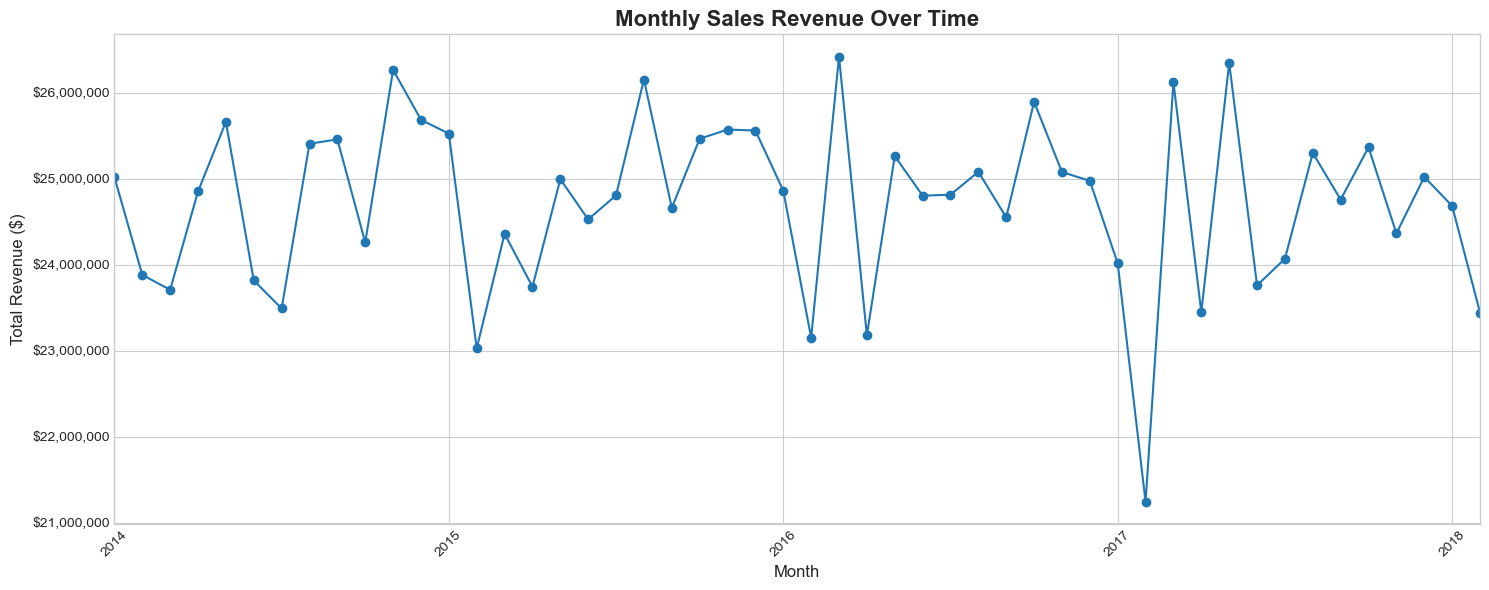

In [34]:
monthly_sales = df.resample('ME', on='order_date')['revenue'].sum()

plt.style.use('seaborn-v0_8-whitegrid') # Use a nice style for the plot
fig, ax = plt.subplots(figsize=(15, 6)) # Set the figure size for better readability

monthly_sales.plot(kind='line', ax=ax, marker='o', linestyle='-')

# 4. Customize the plot with titles and labels.
ax.set_title('Monthly Sales Revenue Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Revenue ($)', fontsize=12)
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better visibility

# Format the y-axis to show currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Ensure the layout is tight
plt.tight_layout()

# 5. Display the plot.
plt.show()

#### Insights:
Sales cycle consistently between 24 million and 26 million with clear peaks in late spring to early summer and through each january

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions

In [35]:
# Removing 2018 data from the dataset as it may lead to bias

df = df[df['order_date'].dt.year != 2018]
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


#### 2. Monthly Sales Trend (All Years Combined)
Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

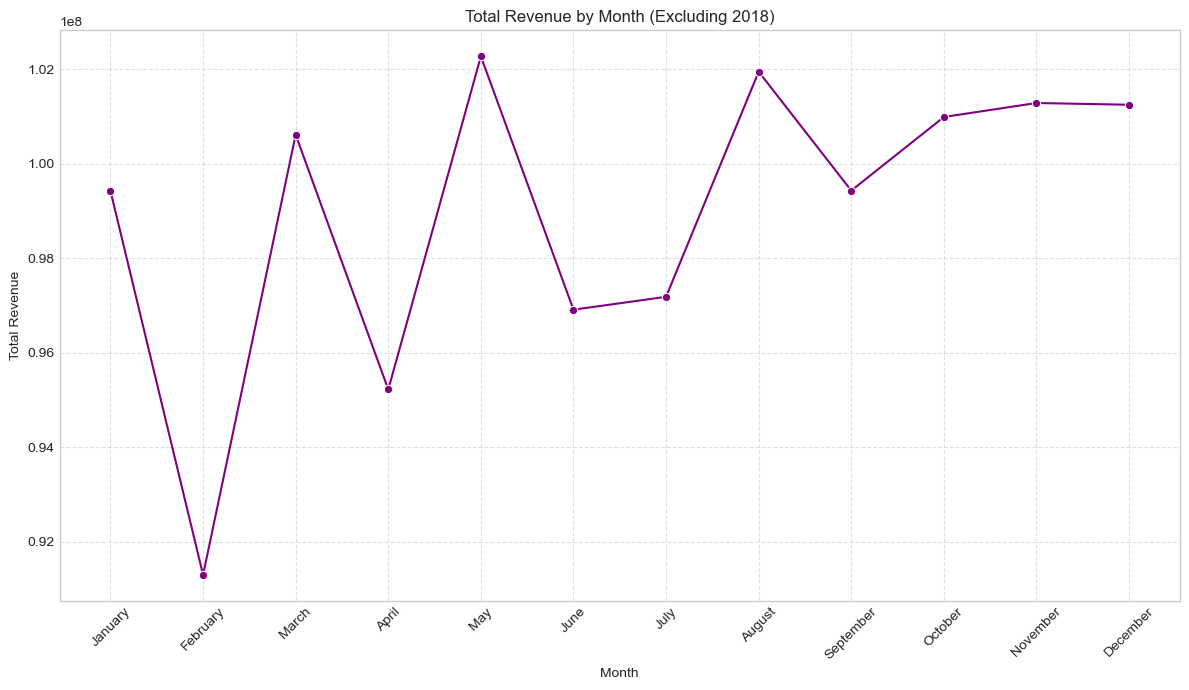

In [36]:
df['month_name'] = df['order_date'].dt.strftime('%B')
df['month_number'] = df['order_date'].dt.month

# Group by month and sum the revenue
monthly_revenue_agg = df.groupby(['month_number', 'month_name'])['revenue'].sum().reset_index()

# Sort by month number to ensure correct chronological order
monthly_revenue_agg = monthly_revenue_agg.sort_values('month_number')

plt.figure(figsize=(12, 7))
sns.lineplot(x='month_name', y='revenue', data=monthly_revenue_agg, sort=False, marker='o', color='purple')
plt.title('Total Revenue by Month (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

#### Insights
Across all years, January begins strong with roughly 99 mil, followed by a steep decline through April's slowpoint(95M).
Sales rebound in May and August (102M) before settling to a plateau of 99-101M from September to December.

This pattern reveals a strong post New Year surge, a spring dip, and a mid summer bump each calendar year


#### 3. Sales by Region


C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\4124935696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='plasma')


Text(0, 0.5, 'Total Revenue')

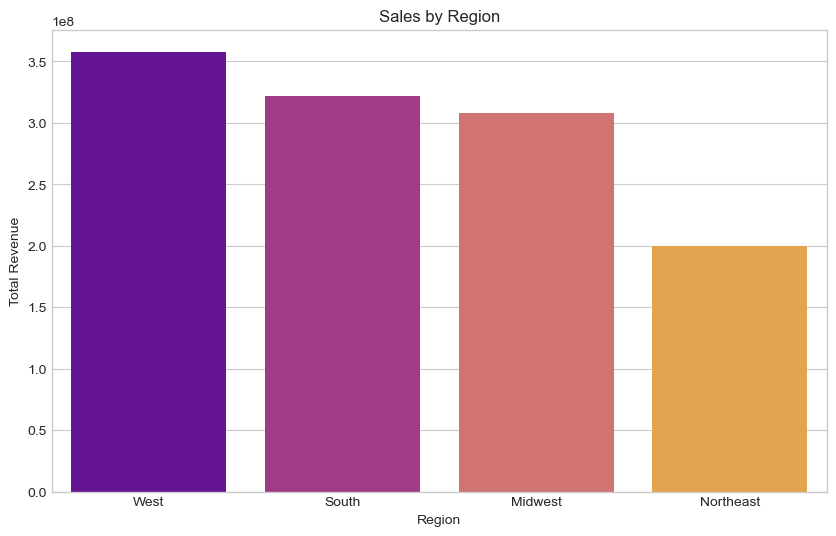

In [37]:
plt.figure(figsize=(10,6))
region_sales = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='plasma')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')


#### Insights:
West dominates with roughly 360 M in sales (35 % of total), underscoring its market leadership.
South & Midwest each contribute over 320 M (32 %), indicating strong, consistent demand across central regions.
Northeast trails at about $210 M (20 %), signaling room for growth and targeted investment.
Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.

#### 4. Top 10 Products by Revenue 

C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\3607813804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


Text(0, 0.5, 'Product Name')

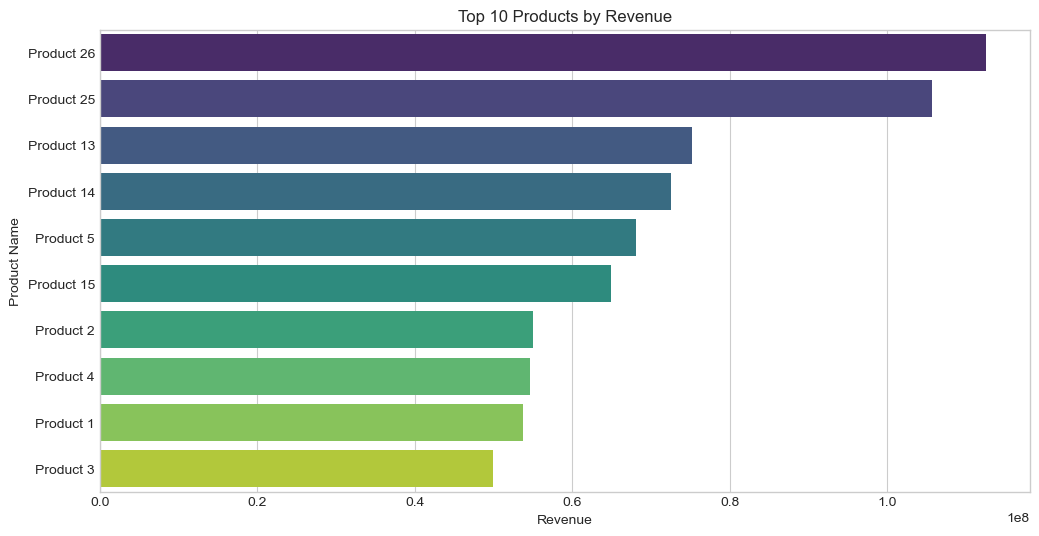

In [38]:
plt.figure(figsize=(12, 6))
top_products = df.groupby('product_name')['revenue'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')


#### 5. 10 Least Selling Products by Revenue

C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\1112663598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_products.values, y=bottom_products.index, palette='viridis')


Text(0, 0.5, 'Product Name')

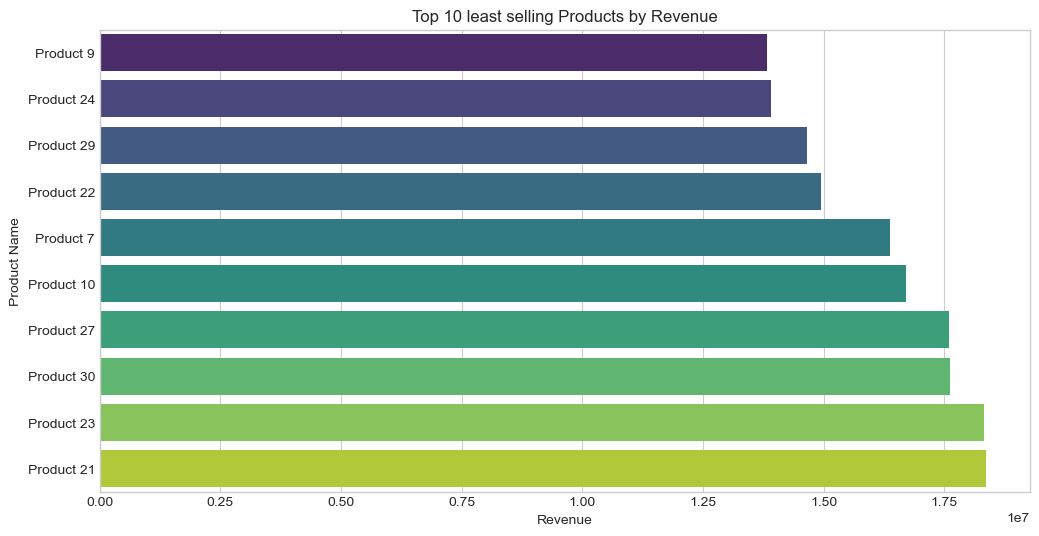

In [39]:
plt.figure(figsize=(12, 6))
bottom_products = df.groupby('product_name')['revenue'].sum().nsmallest(10)
sns.barplot(x=bottom_products.values, y=bottom_products.index, palette='viridis')
plt.title('Top 10 least selling Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')

#### 6. Revenue Distribution by Channel

Text(0, 0.5, '')

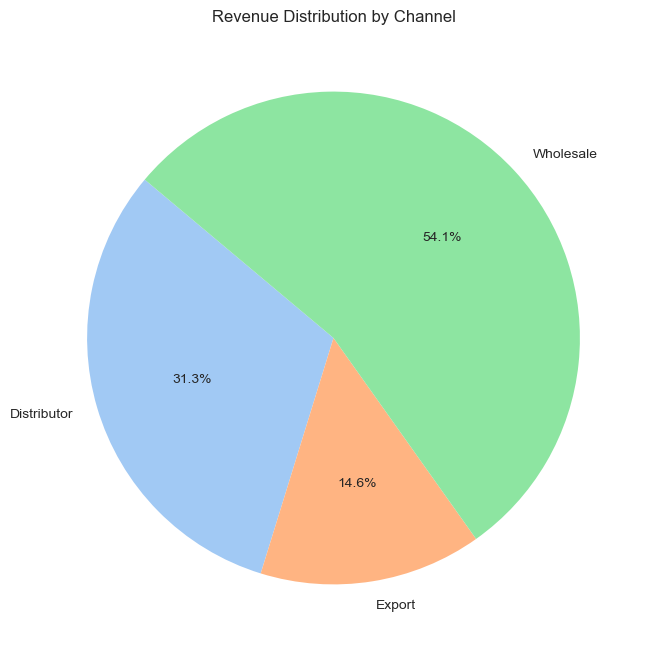

In [40]:
plt.figure(figsize=(8, 8))
channel_sales = df.groupby('channel')['revenue'].sum()
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Channel')
plt.ylabel('')


#### 7. Unit Price Distribution for Products
Compare pricing variability across different products to identify price consistency and outliers

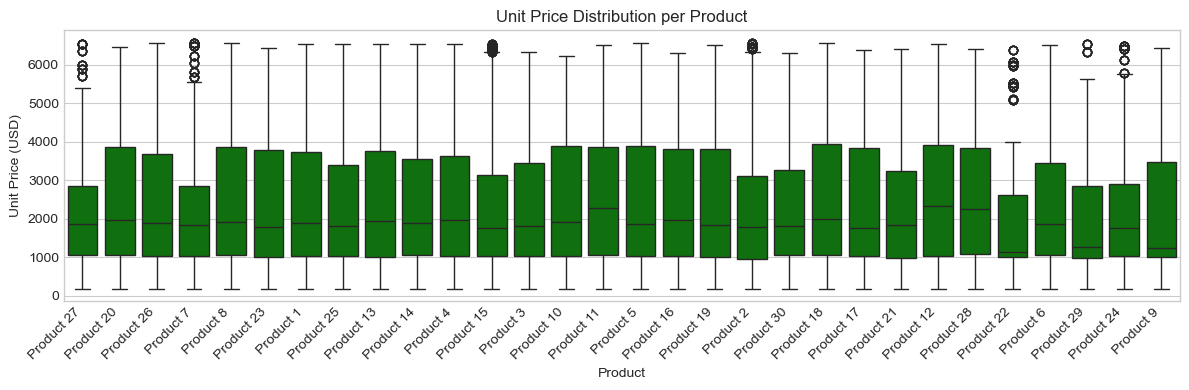

In [41]:
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Insights:
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 0-100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

#### 8.Average Profit Margin by Channel

C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\2990130996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit_margin_channel.index, y=avg_profit_margin_channel.values, palette='coolwarm')


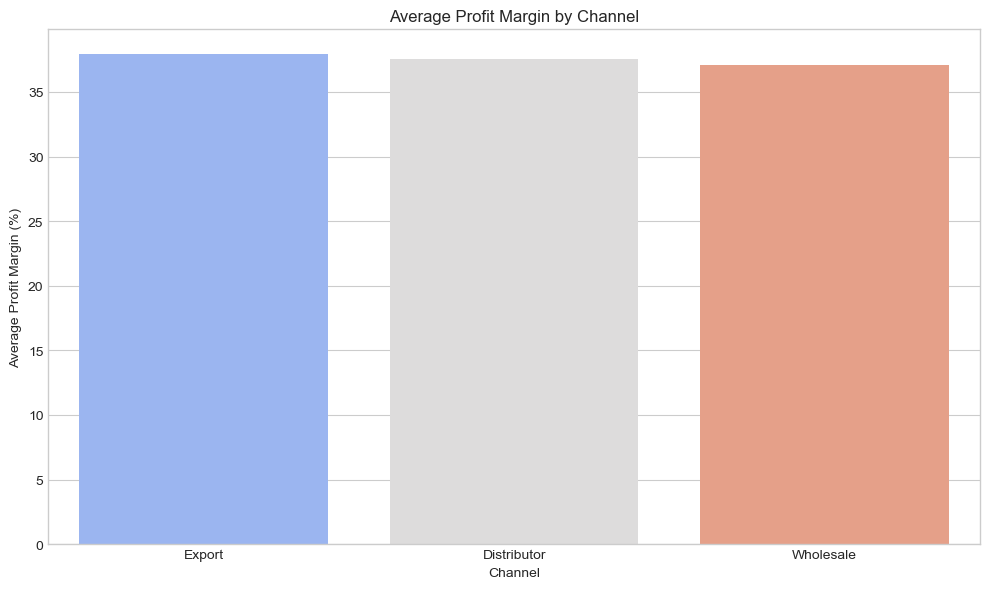

In [42]:

avg_profit_margin_channel = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_profit_margin_channel.index, y=avg_profit_margin_channel.values, palette='coolwarm')
plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.tight_layout()


#### INSIGHTS:
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

This uniformity implies well-controlled costs and pricing power everywhere.

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

#### 8. Top and Bottom 10 Customers

C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\1426955756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_10_customers.values, y=top_10_customers.index, palette='Greens_r')
C:\Users\Asus\AppData\Local\Temp\ipykernel_167860\1426955756.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=bottom_10_customers.values, y=bottom_10_customers.index, palette='Reds_r')


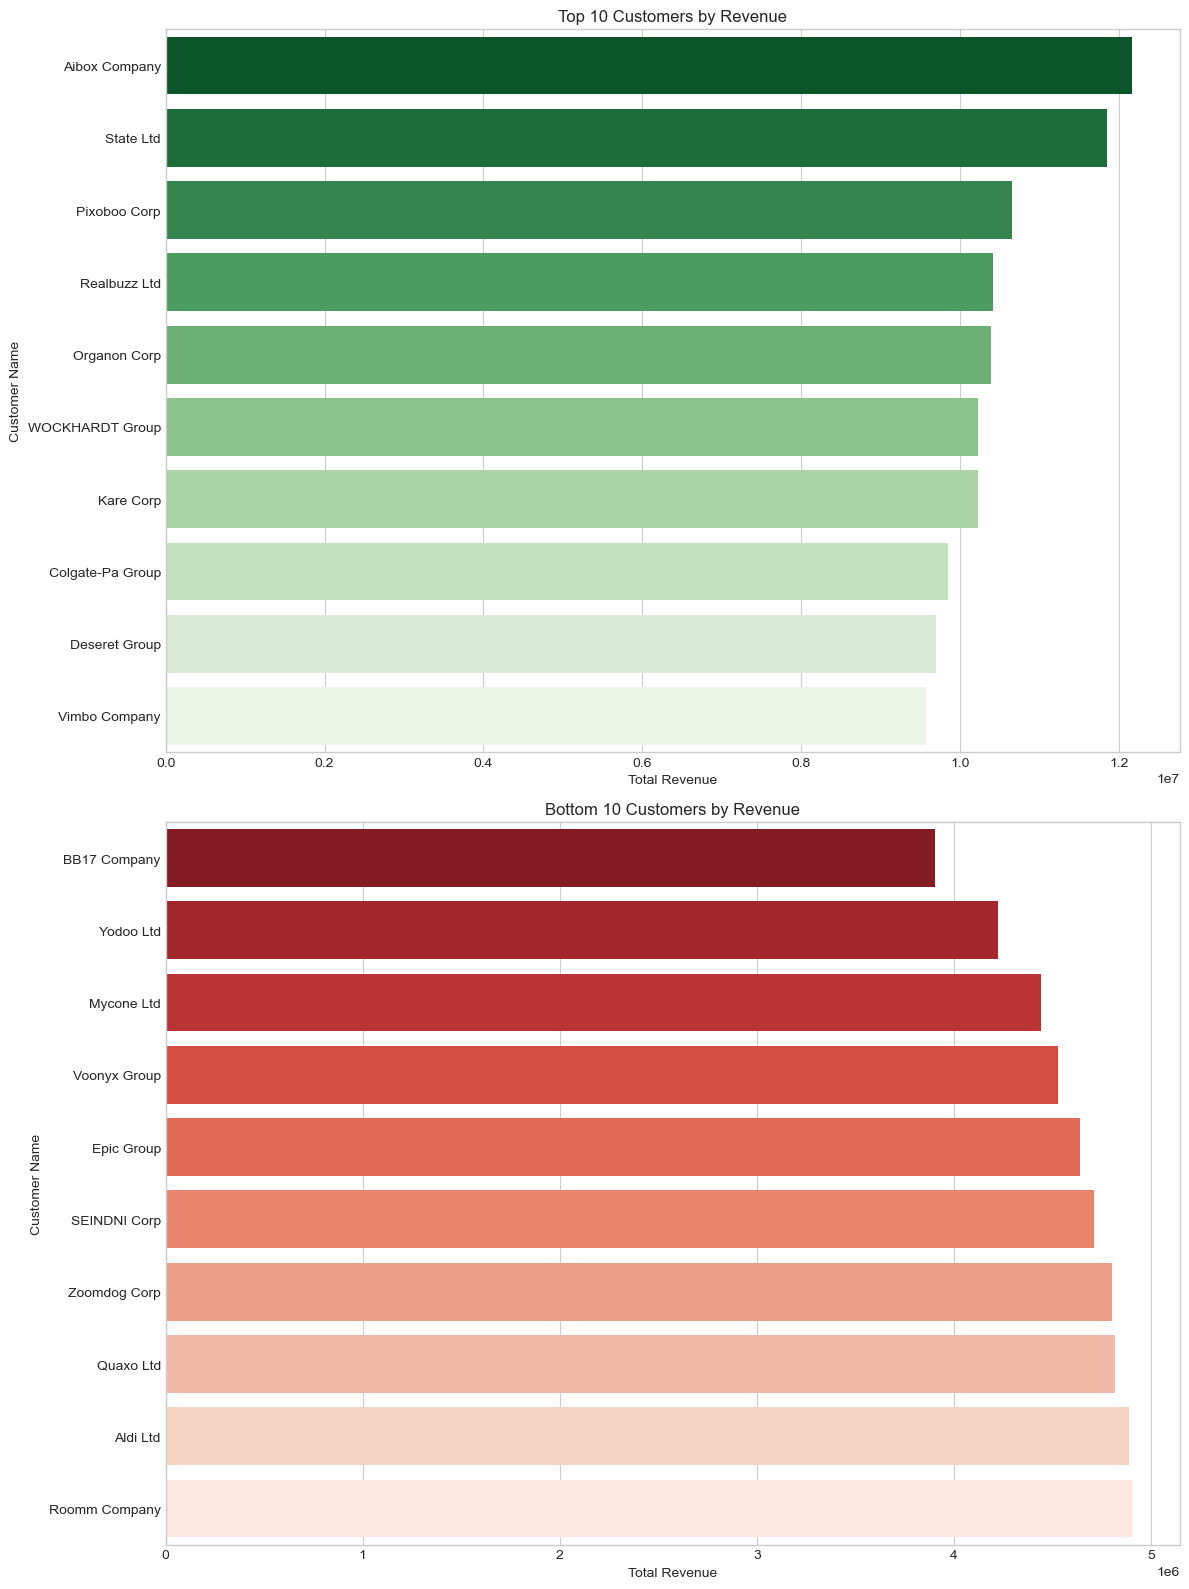

In [43]:

customer_revenue = df.groupby('customer_name')['revenue'].sum()
top_10_customers = customer_revenue.nlargest(10)
bottom_10_customers = customer_revenue.nsmallest(10)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Top 10 Customers Plot
sns.barplot(ax=axes[0], x=top_10_customers.values, y=top_10_customers.index, palette='Greens_r')
axes[0].set_title('Top 10 Customers by Revenue')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Customer Name')

# Bottom 10 Customers Plot
sns.barplot(ax=axes[1], x=bottom_10_customers.values, y=bottom_10_customers.index, palette='Reds_r')
axes[1].set_title('Bottom 10 Customers by Revenue')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Customer Name')

plt.tight_layout()

#### Insights:
Aibox Company tops the list with 12.5M, followed closely by State Ltd.(12.2M), while the 10th-ranked Deseret Group still contributes 9.9M demonstrating a tight 10-12M top tier.

At the bottom, Johnson Ltd leads its group with 5.1M, doqnn to BB17 Company at 4.1 M—roughly half the top customer’s revenue.

This steep drop from 10M+ to 4–5 M highlights high revenue concentration among the top customers.

Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.

#### 9. Customer Segmentation: Revenue v/s Profit Margin
Segment customers by total revenue and average profit margin, highlighting order volume

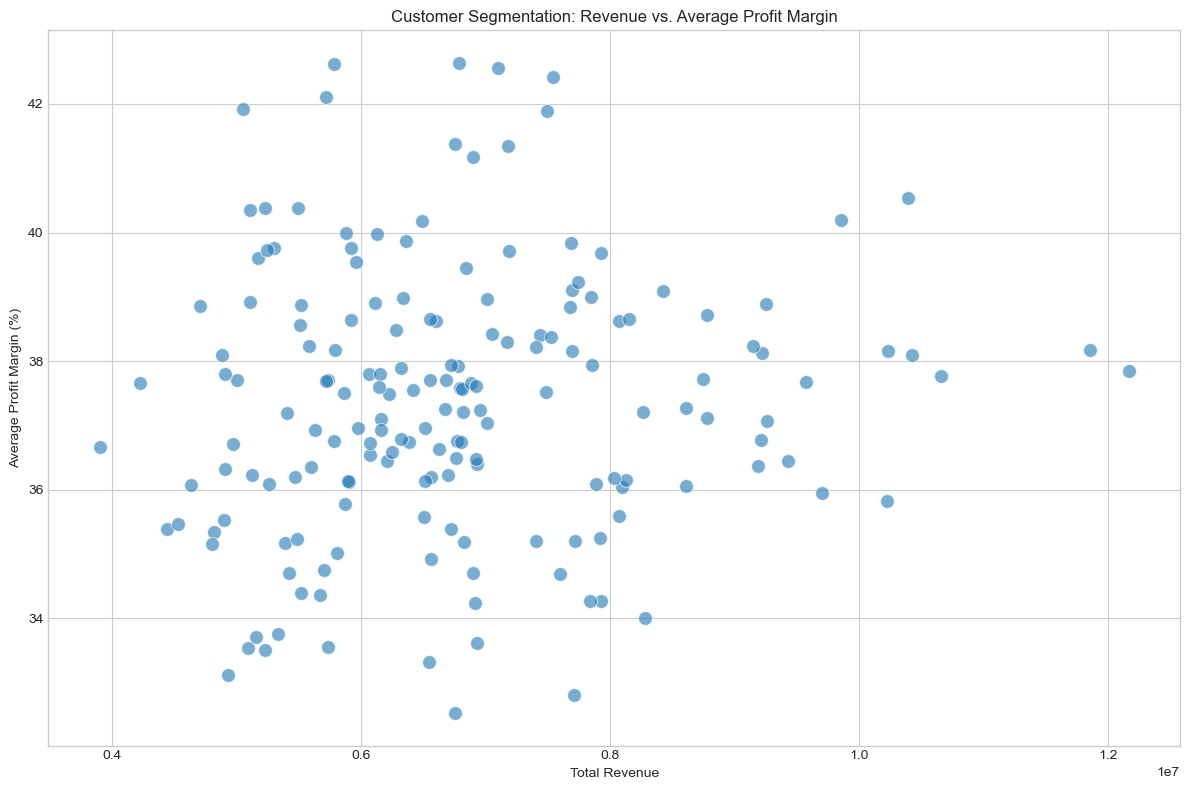

In [44]:
# --- 4. Customer Segmentation: Revenue vs Profit margin ---
customer_analysis = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    avg_profit_margin=('profit_margin_pct', 'mean')
).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_revenue', y='avg_profit_margin', data=customer_analysis, alpha=0.6, edgecolor='w', s=100)
plt.title('Customer Segmentation: Revenue vs. Average Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)
plt.tight_layout()

#### Insights:
Customers with >10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.

Most customers cluster within the 6–10 M range and show stable margins (34–40%), suggesting consistent pricing in this tier.

Customers below $6 M display the widest margin variance (33–43%), pointing to more volatile cost structures or discounts among smaller accounts.

Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

#### 10. Correlation Heatmap of Numeric Features
Identify relationships among key numeric variables to uncover potential multicollinearity

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

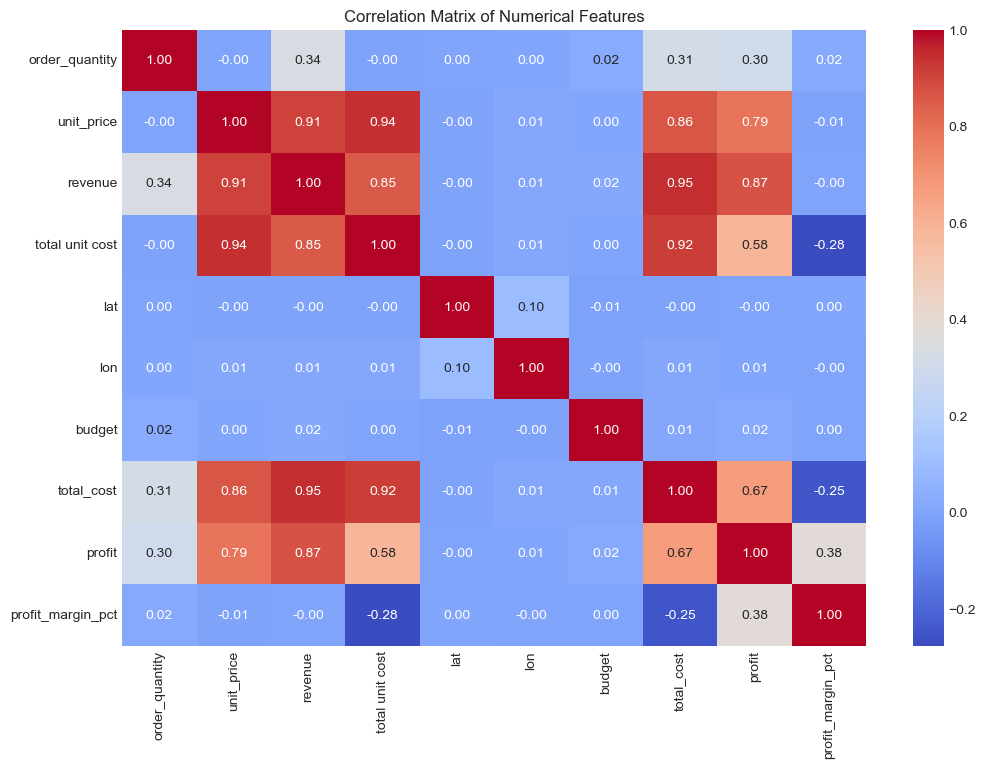

In [45]:
plt.figure(figsize=(12, 8))
# Selecting only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

#### Insights:
Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.

Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.

Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.

Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

### Key Insights:
Monthly Revenue Cycle:
Revenue stays stable between ≈23M-26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

Top Products (Revenue):
Product 26: 110M; 
Product 13: 68–75M;
Bottom performers: 52–57M.

Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

